# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Introduction to Data Science

## Lab 4:  Feed Forward Neural Networks I

**Harvard University**<br/>
**Spring 2022**<br/>
**Instructors**: Mark Glickman & Pavlos Protopapas<br/>
**Lab Leaders**: Marios Mattheakis & Chris Gumb
<br/>

The goal of this section is to become familiar with a basic Artificial Neural Network architecture, the Feed-Forward Neural Network (FFNN). 

Specifically, we will: 
  
1. Quickly review the **FFNN *anatomy***.
2. **Design** a simple FFNN from scratch (using numpy) and **fit** toy datasets.
3. **Quantitatively evaluate** the prediction (fit) by using the *mean square error* (MSE) metric.
4. Develop intuition for the FFNN as a **universal approximator** and understand this property by inspecting the functions generated by an FFNN.
5. Use **forward propagation** with TensorFlow and Keras with our previous designs as well as more complex network architectures.
6. **PyTorch** implementation (extra material) 

#### Import packages

In [99]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

####  
import tensorflow as tf
# from sklearn.metrics import mean_squared_error


---------
## 1. Review of the ANN *anatomy*  


#### Input, Hidden Layers, and Output Layers

The **forward** pass through an FFNN  is  a sequence of linear (affine) and nonlinear operations (activation). 



<img src="ffnn.png" width="70%"/>

The **Activation function** is a nonlinear function. A list of activation functions can be found [here](https://en.wikipedia.org/wiki/Activation_function).

## 2. Design a Feed Forward Neural Network


Let's create a simple FFNN  with  *one input* neuron,   one hidden layer of arbitrary number of neurons, and one linear neuron for the output layer. The purpose here is to become familiar with the **forward propagation**. 

- Define the ReLU and Sigmoid nonlinear functions. These are two commonly used activation functions. 
- Create an FFNN with one hidden neuron and become familiar with the activation function.
- **Activity**: Load the toyDataSet_1.csv and fit (manually tuning the weights). This is a simple regression problem with one input and one output.
- Write a function for the forward pass of a single input/output FFNN with a single hidden layer of arbitrary number of neurons. Tune the weights randomly and inspect the generated functions. Is this network a *universal approximator*?

### Define activation functions
*Rectified Linear Unit*  (ReLU) function is defined as $$g(x)=\max(0,x)$$


<img src="relu_activation.png" width="30%"/>



*Sigmoid*  function is defined as $$\sigma(x)=\frac{1}{1+e^{-z}}$$

<img src="sigmoid_activation.png" width="30%"/>




In [100]:
def g(z: float) -> float :
    # !!!!!!!!!!!!
    return  np.maximum(0, z)
# or 
# g = lambda z: np.maximum(0, z)

def sig(z: float) -> float : 
    return 1/(1 + np.exp(-z)) 

### Construct a FFNN with hard-coded parameters. No training is performed here.

#### ReLU activation

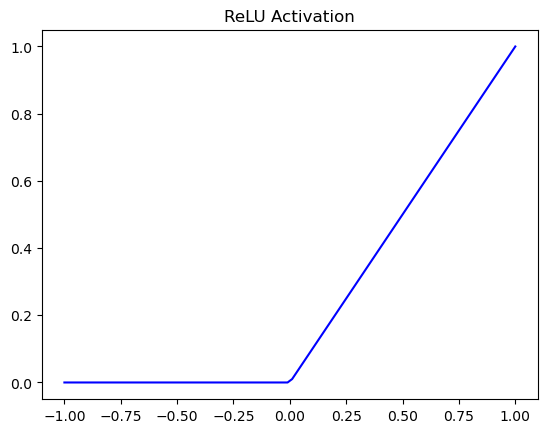

In [101]:
# create an input vector
x_train = np.linspace(-1,1,100)

# set the network parameters
w1, b1 = 1, 0. 
w2, b2  = 1, 0 


#### HIDDEN LAYER ####
# affine operation
l1 = w1*x_train + b1
# RELU activation
h = g(l1)

# output linear layer
y_train = w2*h+b2

plt.plot(x_train, y_train,'-b' )
plt.title('ReLU Activation')
plt.show()

#### Sigmoid activation

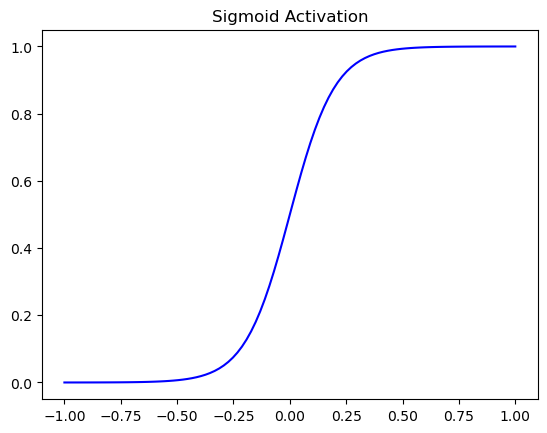

In [102]:
# input vector
x_train = np.linspace(-1,1,100)

# set the network parameters
w1, b1 = 10, 0.
w2, b2  = 1, 0

#### HIDDEN LAYER ####
# affine operation
l1 = w1*x_train + b1
# Sigmoid activation
h = sig(l1)

# output linear layer
y_train = w2*h+b2


plt.plot(x_train, y_train,'-b' )
plt.title('Sigmoid Activation')
plt.show()

#### Plot a few cases to become familiar with  the activation

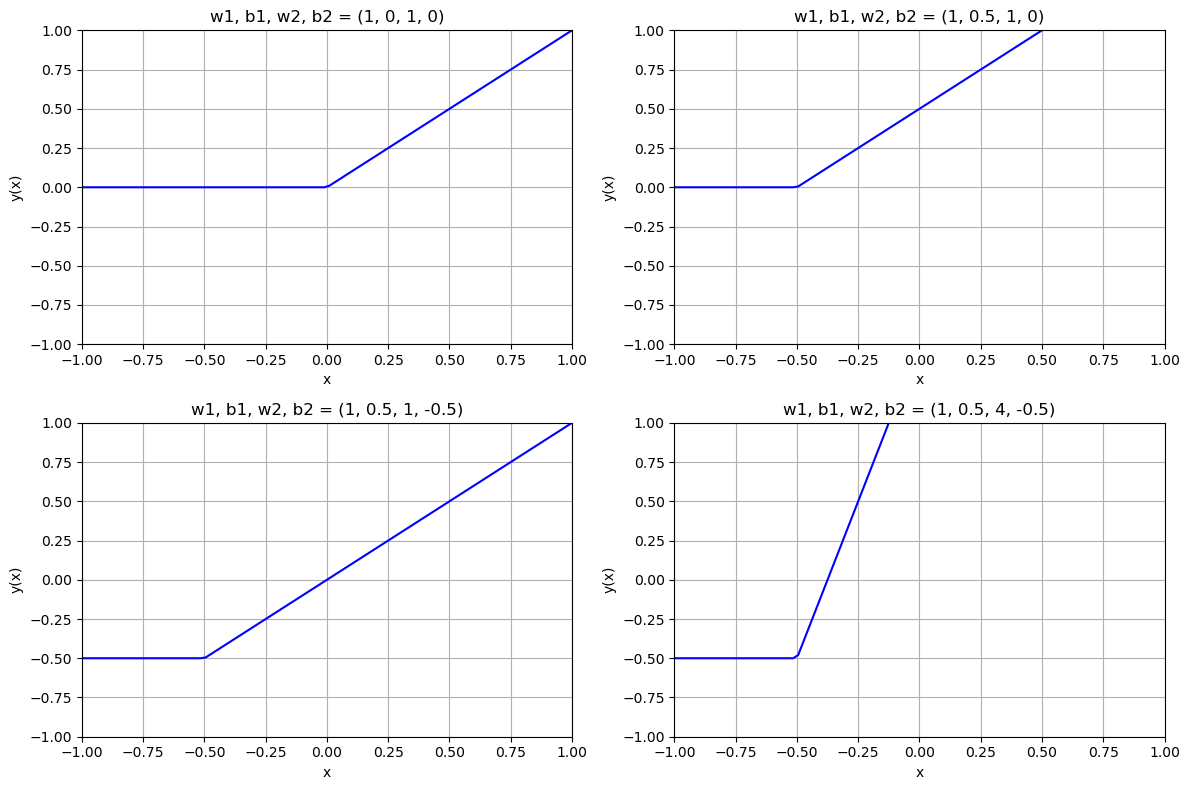

In [103]:
#weights and biases that we want to explore. weight1, bias1, weight2, bias2
weights1 = 1, 0, 1, 0
weights2 = 1, 0.5, 1, 0
weights3 = 1, 0.5, 1, -0.5
weights4 = 1, 0.5, 4, -.5
weights_list = [weights1, weights2, weights3, weights4]

def simple_FFN(w1, b1, w2, b2, activation):
    """
    Takes weights, biases, and an activation function and returns a simple prediction.
    Arguments:
        w1, w2: weights 1 and 2
        b1, b2: biases 1 and 2
    """
    # linear transformation 
    l1 = w1 * x_train + b1
    #activation function + output linear layer
    y_pred = w2 * activation(l1) + b2
    return y_pred

#make our plot
plt.figure(figsize=[12,8])

for i, w_list in enumerate(weights_list):
    
    #make our weight dictionary then feed the dictionary as arguments to the FFN to get a prediction.
    w_dict = dict(zip(["w1", "b1", "w2", "b2"], w_list))
    # !!!!!!!!!!
    #print(w_dict)
    y_train_pred = simple_FFN(**w_dict, activation = g)
    # !!!!!!!!!!!
    # **pass the contents of a dictionary as keyword arguments to a function
    
    #make the plot
    plt.subplot(2, 2, i+1)
    # !!!!!!!!!!
    plt.plot(x_train, y_train_pred, 'b')
    plt.ylim([-1,1])
    plt.xlim([-1,1])
    plt.title('w1, b1, w2, b2 = {}'.format(w_list))
    plt.ylabel("y(x)")
    plt.xlabel("x")
    plt.grid('on')
plt.tight_layout()

#### Explore the sigmoid activation

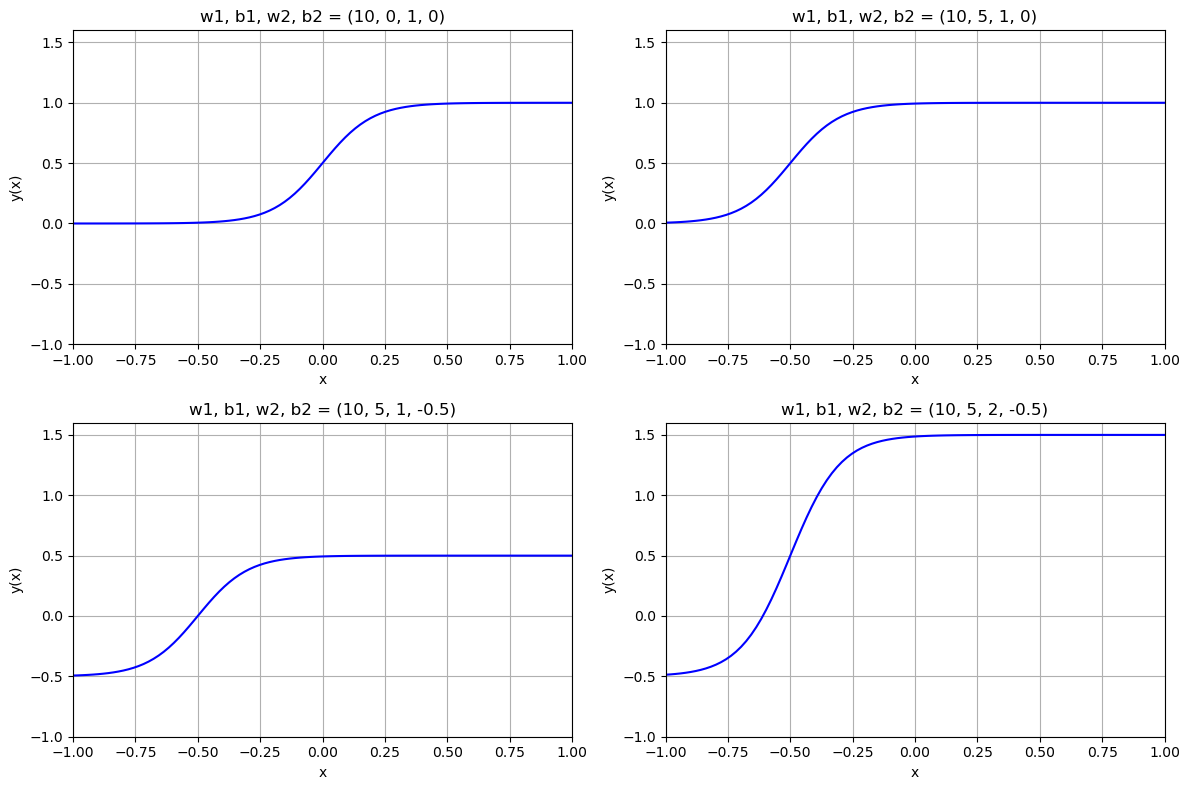

In [104]:
#weights and biases that we want to explore. weight1, bias1, weight2, bias2
weights_1 = 10, 0, 1, 0
weights_2 = 10, 5, 1, 0
weights_3 = 10, 5, 1, -.5
weights_4 = 10, 5, 2, -.5
weights_list = [weights_1, weights_2, weights_3, weights_4]

#make our plot
plt.figure(figsize=[12,8])

for i, w_list in enumerate(weights_list):
    
    #make our weight dictionary then feed the dictionary as arguments to the FFN to get a prediction.
    #note how we have changed the activation function to sigmoid.
    w_dict = dict(zip(["w1", "b1", "w2", "b2"], w_list))
    y_train_pred = simple_FFN(**w_dict, activation = sig)
    
    #make the plot
    plt.subplot(2, 2, i+1)
    plt.plot(x_train, y_train_pred, 'b')
    plt.ylim([-1,1.6])
    plt.xlim([-1,1])
    plt.title('w1, b1, w2, b2 = {}'.format(w_list))
    plt.ylabel("y(x)")
    plt.xlabel("x")
    plt.grid('on')

plt.tight_layout()

# Activity 1

**Design a simple FFNN to fit a simple dataset**

- Load the `toyDataSet_1.csv` from the current directory.
- Write an FFNN with `one hidden` layer of `one neuron` and fit the data. 
- Between `ReLU` and `Sigmoid`, choose which activation function works better 
- Make a plot with the ground truth data and the prediction
- Write a custom mean square error (MSE) or use the sklearn `mean_squared_error()` to evaluate  the prediction

**For this example, don't split the data into training and test sets. Just fit and evaluate the predictions on the entire set.**


In [105]:
def plot_toyModels(x_data, y_data, y_pred=None):
    """
    Generates a plot of the data, as well as the predictions when provided.
    Arguments:
        x_data: x from training data
        y_data: y from training data
        y_pred: predicted y values
    """
    if type(y_data) != type(None):
        plt.plot(x_data, y_data,'or',label='data')
    if type(y_pred) != type(None):
        plt.plot(x_data, y_pred,'-b', linewidth=4, label='FFNN' , alpha=.7)
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.legend()
    
def mean_squared_error(y_true, y_network):
    """
    Calculate the MSE between the true values and the predicted.
    Arguments:
        y_true: actual y from data
        y_pred: predicted y from model
    """
    # This can also be loaded from sklearn or tensorflow
    # e.g. sklearn.metrics.mean_squared_error
    return ( (y_true-y_network)**2 ).mean()


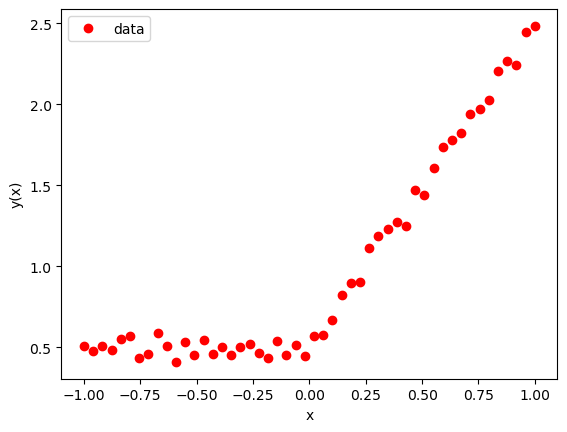

In [106]:
toySet_1 = pd.read_csv('toyDataSet_1.csv')
x_train = toySet_1['x'].values.reshape(-1,1)
y_train = toySet_1['y'].values.reshape(-1,1)

plot_toyModels(x_train, y_train)

The MSE for the training set is  0.0023


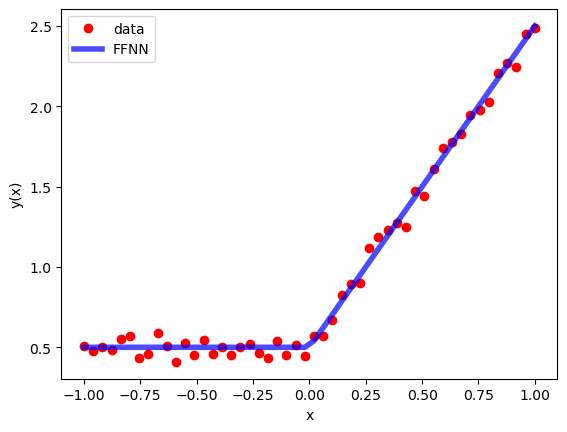

In [107]:
## your code here

# set the network parameters
w1 = 2
b1 = 0

w2 =1
b2 =0.5

# affine operation
l1 = w1*x_train+b1

# activation (Choose between ReLu or Sigmoid)
h = g(l1)
# output linear layer
y_model_train = w2 * h +b2


# Make a plot (use the ploting function defined earlier)
plot_toyModels(x_train, y_train, y_model_train)

# Use MSE to evaluate the prediction
mse_toy = mean_squared_error(y_train, y_model_train)
print('The MSE for the training set is ', np.round(mse_toy,5))


ReLU: The MSE for the training set is  0.0023
Sigmoid: The MSE for the training set is  0.42874


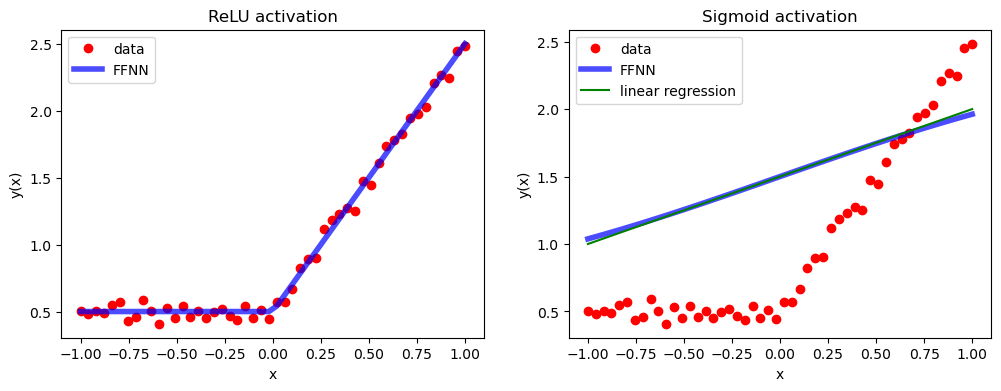

In [108]:
######################
##  Using ReLU
######################
# set the network parameters
w1 = 2
b1 = 0
w2  =1
b2  = 0.5

# affine operation
l1 = w1*x_train + b1

# activation (Choose between ReLu or Sigmoid)
h = g(l1) # for relu

# output linear layer
y_model_train = w2*h + b2

# Make a plot the plot_toyModels function
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plot_toyModels(x_train, y_train, y_model_train)
plt.title('ReLU activation')
# Evaluate the prediction
mse_toy = mean_squared_error(y_train, y_model_train)
print('ReLU: The MSE for the training set is ', np.round(mse_toy,5))



######################
##  Using sigmoid
######################
w1 = 1
b1 = 0
w2  = 2
b2  = 0.5

# affine operation
l1 = w1*x_train + b1

# activation (Choose between ReLu or Sigmoid)
h = sig(l1) # for sigmoid

# output linear layer
y_model_train = w2*h + b2

# Make a plot the plot_toyModels function
plt.subplot(1,2,2)
plot_toyModels(x_train, y_train, y_model_train)
plt.plot(x_train, x_train*0.5+1.5, color = "green", label = "linear regression")
plt.legend()
plt.title('Sigmoid activation')
# Evaluate the prediction
mse_toy = mean_squared_error(y_train, y_model_train)
print('Sigmoid: The MSE for the training set is ', np.round(mse_toy,5))


Why does the choice of ReLU activation give lower MSE than Sigmoid? 

###  A function for a more complex Forward Pass
Let's write a function for the forward propagation through an FFNN with  one input, one linear output neuron, and one hidden layers with arbitrary number of neurons. 

<img src="ffnn2.png" width="25%"/>


General Scheme:
1. One input vector: $x$ 
$$$$
2. Affine (linear) transformation: $l_1$ where $w_{1},~b_{1}$  are the parameter vectors (or $w_{1i},~b_{1i}$):
$$l_1 = \sum_{i=1}^\text{\# neurons} w_{1i}x+b_{1i} = w^T_1 x + b_1  = w_1 \cdot x + b_1 = W_1\cdot X$$
$$$$
3. Activation function (nonlinear transformation): $g(\cdot)$ 
$$h = g(l_1)$$ $$$$

4. Linear Output layer with a vector for weights $w_o$ and a scalar bias $b_o$: 
$$y = w_o^T h+b_o = w_o \cdot h + b_o = W_o\cdot H$$


5. NOTE for the future: You can have a nonlinear output neuron(s) (e.g. for classification tasks)  by just  activating the above linear output, namely
$$y = w_o^T h+b_o = w_o \cdot h + b_o = \sigma(W_o\cdot H)$$



In [109]:
print(x_train)
ones = np.ones((len(x_train),1))
np.append(x_train, ones, axis=1)

[[-1.        ]
 [-0.95918367]
 [-0.91836735]
 [-0.87755102]
 [-0.83673469]
 [-0.79591837]
 [-0.75510204]
 [-0.71428571]
 [-0.67346939]
 [-0.63265306]
 [-0.59183673]
 [-0.55102041]
 [-0.51020408]
 [-0.46938776]
 [-0.42857143]
 [-0.3877551 ]
 [-0.34693878]
 [-0.30612245]
 [-0.26530612]
 [-0.2244898 ]
 [-0.18367347]
 [-0.14285714]
 [-0.10204082]
 [-0.06122449]
 [-0.02040816]
 [ 0.02040816]
 [ 0.06122449]
 [ 0.10204082]
 [ 0.14285714]
 [ 0.18367347]
 [ 0.2244898 ]
 [ 0.26530612]
 [ 0.30612245]
 [ 0.34693878]
 [ 0.3877551 ]
 [ 0.42857143]
 [ 0.46938776]
 [ 0.51020408]
 [ 0.55102041]
 [ 0.59183673]
 [ 0.63265306]
 [ 0.67346939]
 [ 0.71428571]
 [ 0.75510204]
 [ 0.79591837]
 [ 0.83673469]
 [ 0.87755102]
 [ 0.91836735]
 [ 0.95918367]
 [ 1.        ]]


array([[-1.        ,  1.        ],
       [-0.95918367,  1.        ],
       [-0.91836735,  1.        ],
       [-0.87755102,  1.        ],
       [-0.83673469,  1.        ],
       [-0.79591837,  1.        ],
       [-0.75510204,  1.        ],
       [-0.71428571,  1.        ],
       [-0.67346939,  1.        ],
       [-0.63265306,  1.        ],
       [-0.59183673,  1.        ],
       [-0.55102041,  1.        ],
       [-0.51020408,  1.        ],
       [-0.46938776,  1.        ],
       [-0.42857143,  1.        ],
       [-0.3877551 ,  1.        ],
       [-0.34693878,  1.        ],
       [-0.30612245,  1.        ],
       [-0.26530612,  1.        ],
       [-0.2244898 ,  1.        ],
       [-0.18367347,  1.        ],
       [-0.14285714,  1.        ],
       [-0.10204082,  1.        ],
       [-0.06122449,  1.        ],
       [-0.02040816,  1.        ],
       [ 0.02040816,  1.        ],
       [ 0.06122449,  1.        ],
       [ 0.10204082,  1.        ],
       [ 0.14285714,

In [110]:
def myFFNN(X, W1, Wo, activation='relu'):
    """
    This function gives the forward pass of a simple feed forward neural network. 
    The network propagates a single input X through a single hidden layer of weights W1, and return 
    a single output (yhat) through a linear output layer with weights Wo. 
    The input and the weight matrices should be given. 
    
    Network specifications:
        input dimensions  = 1
        output dimensions = 1
        hidden layers = 1
        **hidden neurons are determined by the size of W1 or W0**
    
    Parameters:
        Design Matrix:
            X: the design matrix on which to make the predictions.
        weights vectors:
            W1 : parameters of first layer 
            Wo : parameters of output layer
        activation:
            The default activation is the relu. It can be changed to sigmoid
    """
    # Input: 
    # add a constant column for the biases to the input vector X
    ones = np.ones((len(X),1))
    l1 = X
    l1 = np.append(l1, ones, axis=1)
    # !!!!!

    # hidden layer: Affine and activation
    a1 = np.dot(W1, l1.T)
    
    if activation=='relu':
        h1 = g(a1)    
    elif activation=='sigmoid':
        h1 = sig(a1)    
        
    # Output layer (linear layer) (2 steps)
    # (a) Add a const column the h1 for the affine transformation
    ones = np.ones((len(X),1))    
    
    H= np.append(h1.T, ones,axis=1).T
    # (b) Affine
    a = np.dot(Wo,H)
    y_hat = a.T

    return y_hat

#### Use the previous parameters in our forward propagation function to fit the toyDataSet_1.csv. Plot the results and print the associated loss (the MSE)

MSE Loss =  0.0023


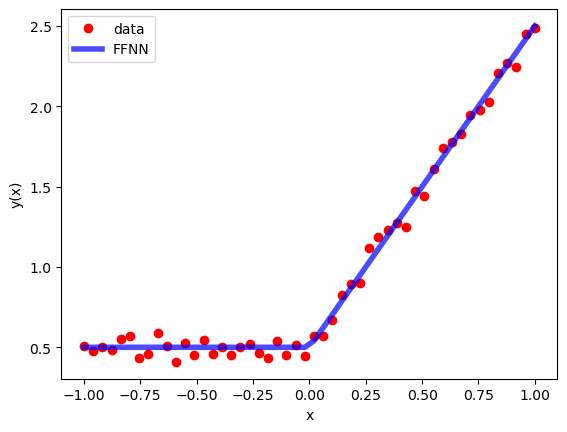

In [111]:
w11 = 2
b11 = 0.0
w21  = 1
b21  = 0.5

# make the parameters matrices
# First layer
W1 = np.array([[w11,b11]])

# Output Layer (only one bias term)
Wo = np.array([[w21,b21]])

# run the model
y_model_1 = myFFNN(x_train, W1, Wo )

# plot the prediction and the ground truth
plot_toyModels(x_train, y_train, y_model_1)

# quantify your prediction
Loss_1 = mean_squared_error(y_train, y_model_1) 
print('MSE Loss = ', np.round(Loss_1,4))

Q: Can we easily can we generalize this network architecture to have many inputs, outputs, and hidden layers? 

A: No, we will need Tensor algebra, and it is much easier to use deep learning packages like TensorFlow and PyTorch for this process. 

### FFNN is a Universal Function Approximator
Here we will explore which functions can be generated using a single-hidden layer network with many neurons.

It is proved that an FFNN can approximate with arbitrary accuracy any continuous function if the network has a sufficient number of hidden neurons.  For a rigorous proof you can check the **[original paper](https://www.sciencedirect.com/science/article/pii/089360809190009T)**.

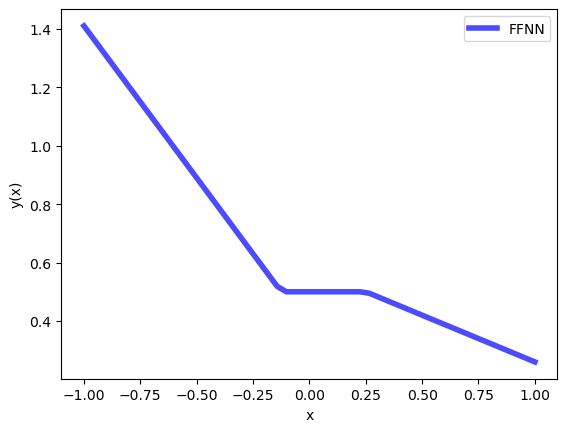

In [112]:
# Two Neurons NNet
w11 = -.8
b11 = -.1

w12 = .4
b12 = -.1

w21  = 1.3
w22  = -.8

b2  = 0.5

# First Layer
W1 = np.array([[w11,b11], [w12,b12]])
# Output Layer (only one bias term)
Wo = np.array([[w21,w22, b2]])

# run the model
y_model_p = myFFNN(x_train, W1, Wo, activation='relu' )
plot_toyModels(x_train, y_data=None, y_pred=y_model_p)


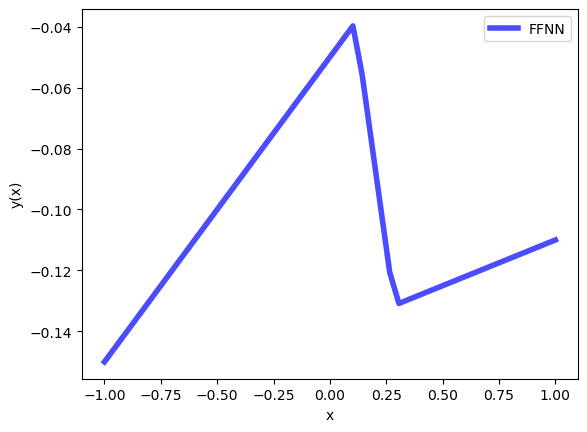

In [113]:
# Three Neurons NNet
w11 = -.1
b11 = .3

w12 = .9
b12 = -.1

w13 = .7
b13 = -.2


w21  = -1.
w22  = -.7
w33  = .8

b2  = 0.25

# First Layer
W1 = np.array([[w11,b11], [w12,b12], [w13,b13]])
# Output Layer (only one bias term)
Wo = np.array([[w21,w22,w33, b2]])

# run the model
y_model_p = myFFNN(x_train, W1, Wo )

# plot the prediction and the ground truth
plot_toyModels(x_train, y_data=None, y_pred=y_model_p)
plt.show()

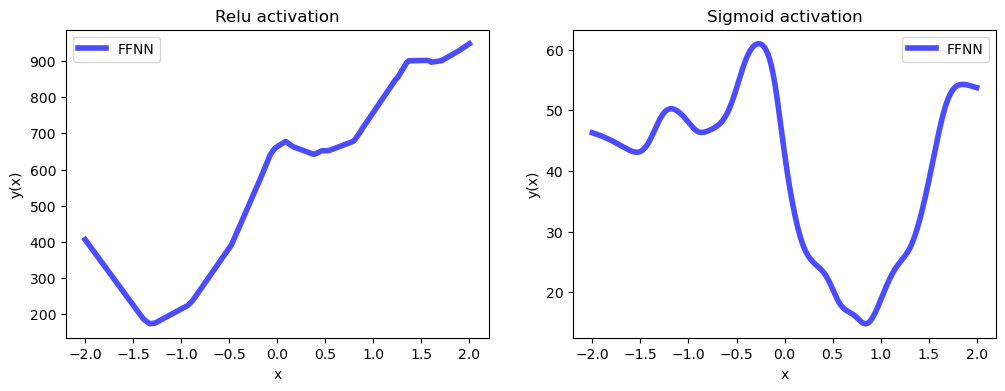

In [114]:
# Random numbers between a,b
# (b-a) * np.random.random_sample((4, 4)) + a
a = -20
b = 20

# N neurons
N = 50

# Create random parameter matrices
W1 = (b-a) * np.random.random_sample((N, 2)) + a
# random.random_sample(size=None) Return random floats in the half-open interval [0.0, 1.0).

Wo = (b-a) * np.random.random_sample((1, N+1)) + a

# make a bigger interval
x_train_p2 = np.linspace(-2,2,1000)
x_train_p2= x_train_p2.reshape(-1,1)

## run the models and plot the predictions
plt.figure(figsize=[12,4])

# # RELU ACTIVATION
y_model_p2 = myFFNN(x_train_p2, W1, Wo, activation='relu' )

plt.subplot(1,2,1)
# !!!!!!
plot_toyModels(x_train_p2, y_data=None, y_pred=y_model_p2)
plt.title('Relu activation')

# ## SIGMOID ACTIVATION
y_model_p2 = myFFNN(x_train_p2, W1, Wo, activation='sigmoid' )

plt.subplot(1,2,2)
plot_toyModels(x_train_p2, y_data=None, y_pred=y_model_p2)
plt.title('Sigmoid activation')
plt.show()

Run the above cell multiple times to see how many different predictions the network can make.


-------------

## 3. TensorFlow and Keras

**Keras, Sequential:** [Source]
(https://keras.io/models/sequential/)


There are many powerful deep learning packages to work with neural networks like **TensorFlow** and **PyTorch**. These packages provide both the forward and back propagations, and many other functionalities. The forward pass is used to make   predictions while the backward (back propagation)  is used to  train (optimize) a network. Training means  to find the optimal parameters for a specific task.

Here, we use TensorFlow (TF) and Keras to employ FFNN. 
- Use Keras to fit the simple toyDataSet_1 dataset. Tune the weights manually.
    - Learn the `Sequential` method 
 
At the end of this notebook we have a **PyTorch** implementation of the same network architecture.

**Next Lab:** We will learn how to use backpropagation (fit method) to find the optimal parameters.

#### Import packages from keras

In [115]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

#### Import the toyDataSet_1 and define the weights used in  Activity 1 for the ReLU architecture

In [116]:
toySet_1 = pd.read_csv('toyDataSet_1.csv')
x_train = toySet_1['x'].values.reshape(-1,1)
y_train = toySet_1['y'].values.reshape(-1,1)

w1 = 2
b1 = 0.0
w2  = 1
b2  = 0.5


#### Use Keras to build a model similar to our `myFFNN` defined earlier
Below we will use the Keras' package to first define a sequential model called `Single_neurons_model_fixedWeights`. We will then use the add method to add a single hidden layer to the model with one neuron using ReLU activation.

In [117]:
model = models.Sequential(name='Single_neurons_model_fixedWeights')

###  hidden layer with 1 neuron (or node)
model.add(layers.Dense(1, activation='relu', input_shape=(1,)))

# output layer, one neuron 
model.add(layers.Dense(1,  activation='linear'))

model.summary()


Model: "Single_neurons_model_fixedWeights"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Read and change the network parameters

In [118]:
model.get_weights()

[array([[-0.21888006]], dtype=float32),
 array([0.], dtype=float32),
 array([[-1.6707371]], dtype=float32),
 array([0.], dtype=float32)]

In [119]:
def print_weights(model):
    """
    A function that reads, prints and changes the model weights/biases.
    Arguments:
        model: a Tensorflow model object
    """
    weights = model.get_weights()
    print(dict(zip(["w1", "b1", "w2", "b2"], [weight.flatten()[0] for weight in weights])))

print('Initial values of the parameters')
print_weights(model)

# MANUALLY SETTING THE WEIGHTS/BIASES
# Read the model's weight with the get_weights method
weights = model.get_weights()

# Update the weights/biases of the hidden layer
weights[0][0] = np.array([w1]) #weights 
weights[1]    = np.array([b1]) # biases

# Adjust the weights/biases for the output layer 
weights[2]    =  np.array([[w2]]) # weights
weights[3]    = np.array([b2])    # bias

# Apply the new weights/bias to the model
model.set_weights(weights)
# !!!!!!!!!!

print('\nAfter setting the parameters')
print_weights(model)

Initial values of the parameters
{'w1': -0.21888006, 'b1': 0.0, 'w2': -1.6707371, 'b2': 0.0}

After setting the parameters
{'w1': 2.0, 'b1': 0.0, 'w2': 1.0, 'b2': 0.5}


2/2 [==============================] - 0s 1ms/step
MSE Loss =  0.0023


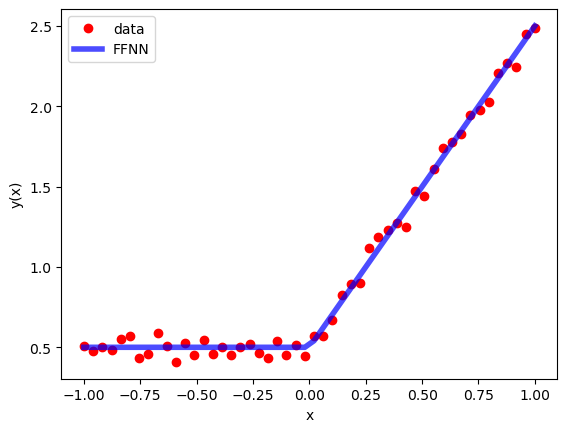

In [120]:
# Pass the data to the predict method to get predictions
y_model_tf1 = model.predict(x_train)

# Plot the true values and our predictions
plot_toyModels(x_train, y_train, y_pred=y_model_tf1)

# Calculate the MSE of our predicitons
Loss_tf1 = mean_squared_error(y_train, y_model_tf1) 
print('MSE Loss = ', np.round(Loss_tf1,4))

**Construct a more complex architecture**

Here we will build a FFNN with one hidden layer containing 20 neurons.

In [157]:
import numpy as np
import tensorflow as tf

# Create a simple Sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Sample input data with shape (50, 1)
x = np.random.rand(50, 1)

# Sample input data with shape (1,)
y = np.array([3.14])

# Making predictions for x
# predictions_x = model.predict(x)

# Making prediction for y
prediction_y = model.predict(y)

predictions_x = model.predict(x)

# run prediction_x first will get error.
# The input_shape should be a tuple that defines the shape of each individual sample in the input data, excluding the batch size. 
# For example, input_shape=(1,) means that each sample should have one feature, and the shape of the entire input data (including the batch size) would be (batch_size, 1).

# When you use model.predict(x), the x data you provide should have the same shape as specified in the input_shape. 
# If your model's input_shape is (1,), then x should have a shape of (batch_size, 1), 
# where batch_size is the number of samples you want to pass to the model for prediction.

# when using model.fit()/model.predict(), it works if the shape of input is the individual sample (excluding batch size)

print(predictions_x.shape)  # Output: (50, 1)
print(prediction_y.shape)   # Output: (1, 1)


2/2 [==============================] - 0s 1ms/step
(50, 1)
(1, 1)


Model: "Many_neurons"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 20)                40        
                                                                 
 dense_47 (Dense)            (None, 1)                 21        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2/2 [==============================] - 0s 1ms/step


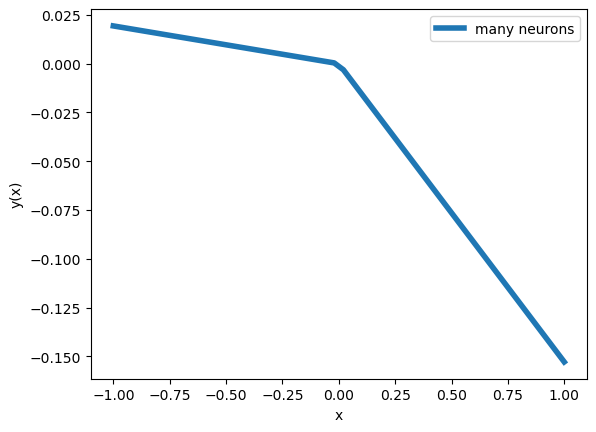

In [158]:
# Define a new sequential model called Many_neurons
model_2 = models.Sequential(name='Many_neurons')

# Add a dense layer with 20 neurons and ReLU activation
model_2.add(layers.Dense(20, activation='relu' ,
#                    kernel_initializer='random_normal', bias_initializer='random_uniform', 
#                    !!!!!!!!!!
                   input_shape=(1, )))

# Add the output layer, still with a single neuron
model_2.add(layers.Dense(1,  activation='linear'))

# Inspect the model
model_2.summary()

## Run a forward pass and plot the output function
y_model_2 = model_2.predict(x_train)
plt.plot(x_train, y_model_2, linewidth=4, label='many neurons' , alpha=1)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()

#### Build a model with multiple hidden layers
Below we create a new model with three hidden layers, each with a different number of neurons and activations.

Model: "Many_layers_neurons"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 20)                40        
                                                                 
 dense_23 (Dense)            (None, 100)               2100      
                                                                 
 dense_24 (Dense)            (None, 50)                5050      
                                                                 
 dense_25 (Dense)            (None, 1)                 51        
                                                                 
Total params: 7241 (28.29 KB)
Trainable params: 7241 (28.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
47/47 [==============================] - 0s 487us/step


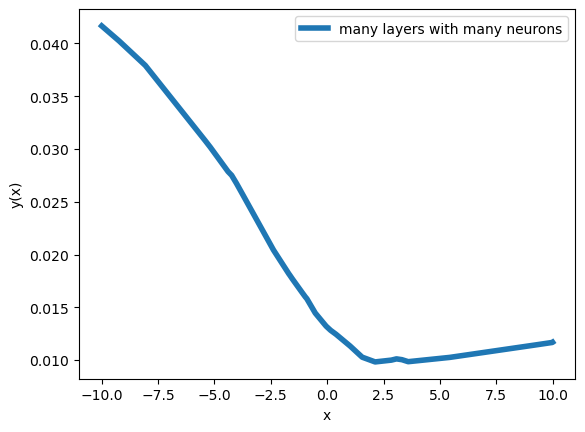

In [125]:
model_3 = models.Sequential(name='Many_layers_neurons')

#### First hidden layer  
model_3.add(layers.Dense(20, activation='relu', 
                   kernel_initializer='random_uniform', bias_initializer='random_uniform', 
                   input_shape=(1,)))

#### Second hidden layer  
model_3.add(layers.Dense(100, activation='tanh', 
                   kernel_initializer='random_normal', bias_initializer='random_uniform'))

#### Third hidden layer  
model_3.add(layers.Dense(50, activation='relu', 
                   kernel_initializer='random_normal', bias_initializer='random_uniform'))

# Add the output layer and check the summary
model_3.add(layers.Dense(1,  activation='linear'))
model_3.summary()

# Define a new input vector
# Notice that the architecture does not depend on the size of the input vector
x_train_3 = np.linspace(-10,10,1500)

## Run a forward pass and plot the output function
y_model_3 = model_3.predict(x_train_3)
plt.plot(x_train_3, y_model_3, linewidth=4, label='many layers with many neurons' , alpha=1)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()

In [162]:
model_3.get_weights()

[array([[-0.00874119, -0.04755289, -0.00522526,  0.01338002, -0.00876694,
          0.04040596,  0.03711562,  0.02609396, -0.03017287,  0.01067525,
          0.04238086,  0.02505333, -0.02501209, -0.01399778, -0.04729433,
          0.00232856,  0.00288625,  0.02084297,  0.0181489 ,  0.00786849]],
       dtype=float32),
 array([-0.01391516, -0.04791423, -0.02739163, -0.03774729, -0.03607167,
         0.04095811,  0.0023521 ,  0.04391069,  0.04672394,  0.02856227,
        -0.04747183, -0.00295382, -0.04312258, -0.01280565,  0.0111804 ,
         0.00680103,  0.00295725, -0.00742537, -0.01724386,  0.03085513],
       dtype=float32),
 array([[ 0.05198239,  0.10822387,  0.09966798, ...,  0.01942257,
         -0.05916566,  0.04850787],
        [ 0.03491006,  0.03509768, -0.05014817, ..., -0.08553251,
         -0.03772767,  0.01921318],
        [-0.00047075,  0.08174024, -0.08792268, ...,  0.00901624,
         -0.11322075,  0.00869222],
        ...,
        [ 0.12336   , -0.09672206,  0.008229

Q: How many parameters does our `Many_layers_neurons` model have? Does it sound like a good idea to manually tune them?

**Stay Tuned...** In the next Lab we will learn how to find the optimal parameters!

## 4. PyTorch Implementation: Extra Material

PyTorch is another library used to build, train, and deploy deep learning models. Most course material will be performed using Tensorflow, but it is good to know about another common library you might encounter. 

A great PyTorch tutorial for an FFNN implementation can be found at: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html


In [126]:
import torch
dtype = torch.float


- In PyTorch we have to define everything as torch tensors  instead of numpy matrices 
- Though, we can transform numpy objects to pytorch tensors by using: **torch.from_numpy(np_array)**

In [127]:
# Create an input vector using PyTorch
x = torch.linspace(-10,10,1000)
print('PyTorch tensor: ', x.size())

# Note how this is nearly the same as using Numpy
x_ = np.linspace(-10,10,1000)
print('Numpy array: ', x_.shape)

# Convert a numpy array to a PyTorch tensor
x  = torch.from_numpy(x_)
print('from numpy to PyTorch: ', x.size())

PyTorch tensor:  torch.Size([1000])
Numpy array:  (1000,)
from numpy to PyTorch:  torch.Size([1000])


Define the input tensor: 
- Specify the type 
- Reshape or unsqueeze. This is what pytorch wants to get

In [128]:
x = torch.linspace(-10,10,1000, dtype=dtype)
print('PyTorch Tensor: ', x.size())

# x=x.reshape(-1,1)
x = x.unsqueeze(-1)
# Returns a new tensor with a dimension of size one inserted at the specified position.

print('Reshaped tensor: ', x.size())

PyTorch Tensor:  torch.Size([1000])
Reshaped tensor:  torch.Size([1000, 1])


 #### PyTorch also provides a sequential functionality
 
 Build the network architecture

In [129]:
model_p = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
     torch.nn.ReLU(),
        torch.nn.Linear(10, 1))

print(model_p)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


**Forward pass**

To perform a forward pass in PyTorch, you pass the data directly to the model as an argument. 

In [130]:
y_p = model_p(x)

Trying to operate tensors may cause problems. For example, try to plot them 

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

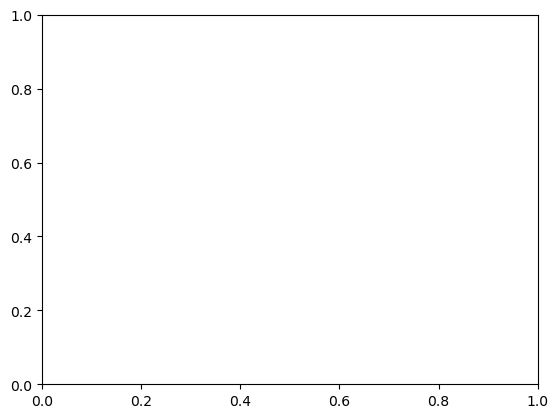

In [131]:
plt.plot(x, y_p)

We can convert PyTorch tensors to numpy by using: **torchTensor.detach().numpy()** 

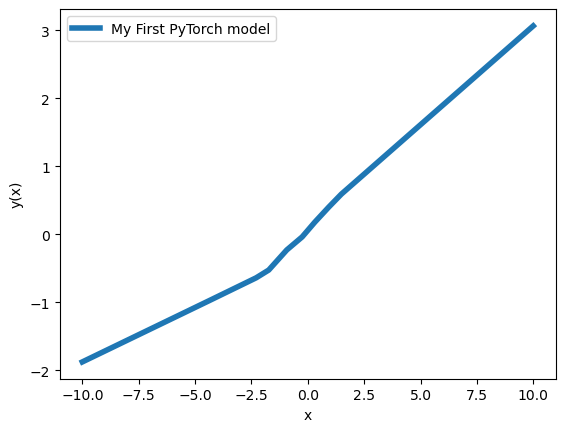

In [ ]:
x_ = x.detach().numpy()
y_ = y_p.detach().numpy()

plt.plot(x_, y_, linewidth=4, label='My First PyTorch model')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()

**A deeper network**

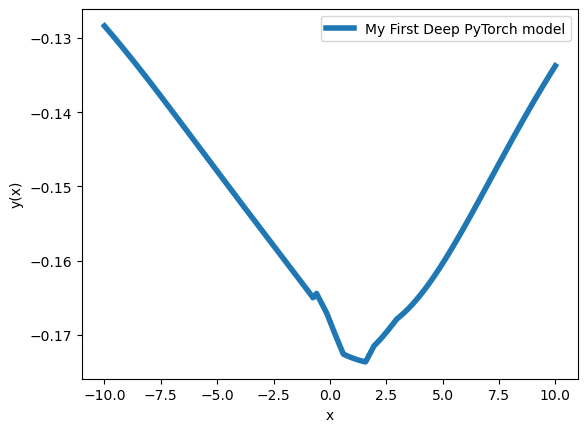

In [ ]:
model_p2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 20),
    torch.nn.Sigmoid(),
    torch.nn.Linear(20, 10),
    torch.nn.Tanh(),
    torch.nn.Linear(10, 1)
)

y_p2 = model_p2(x)

x2_ = x.detach().numpy()
y2_ = y_p2.detach().numpy()

plt.plot(x2_, y2_, linewidth=4, label='My First Deep PyTorch model')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()


----------




## End of Section

----------